#Telecom Customers Churn Prediction


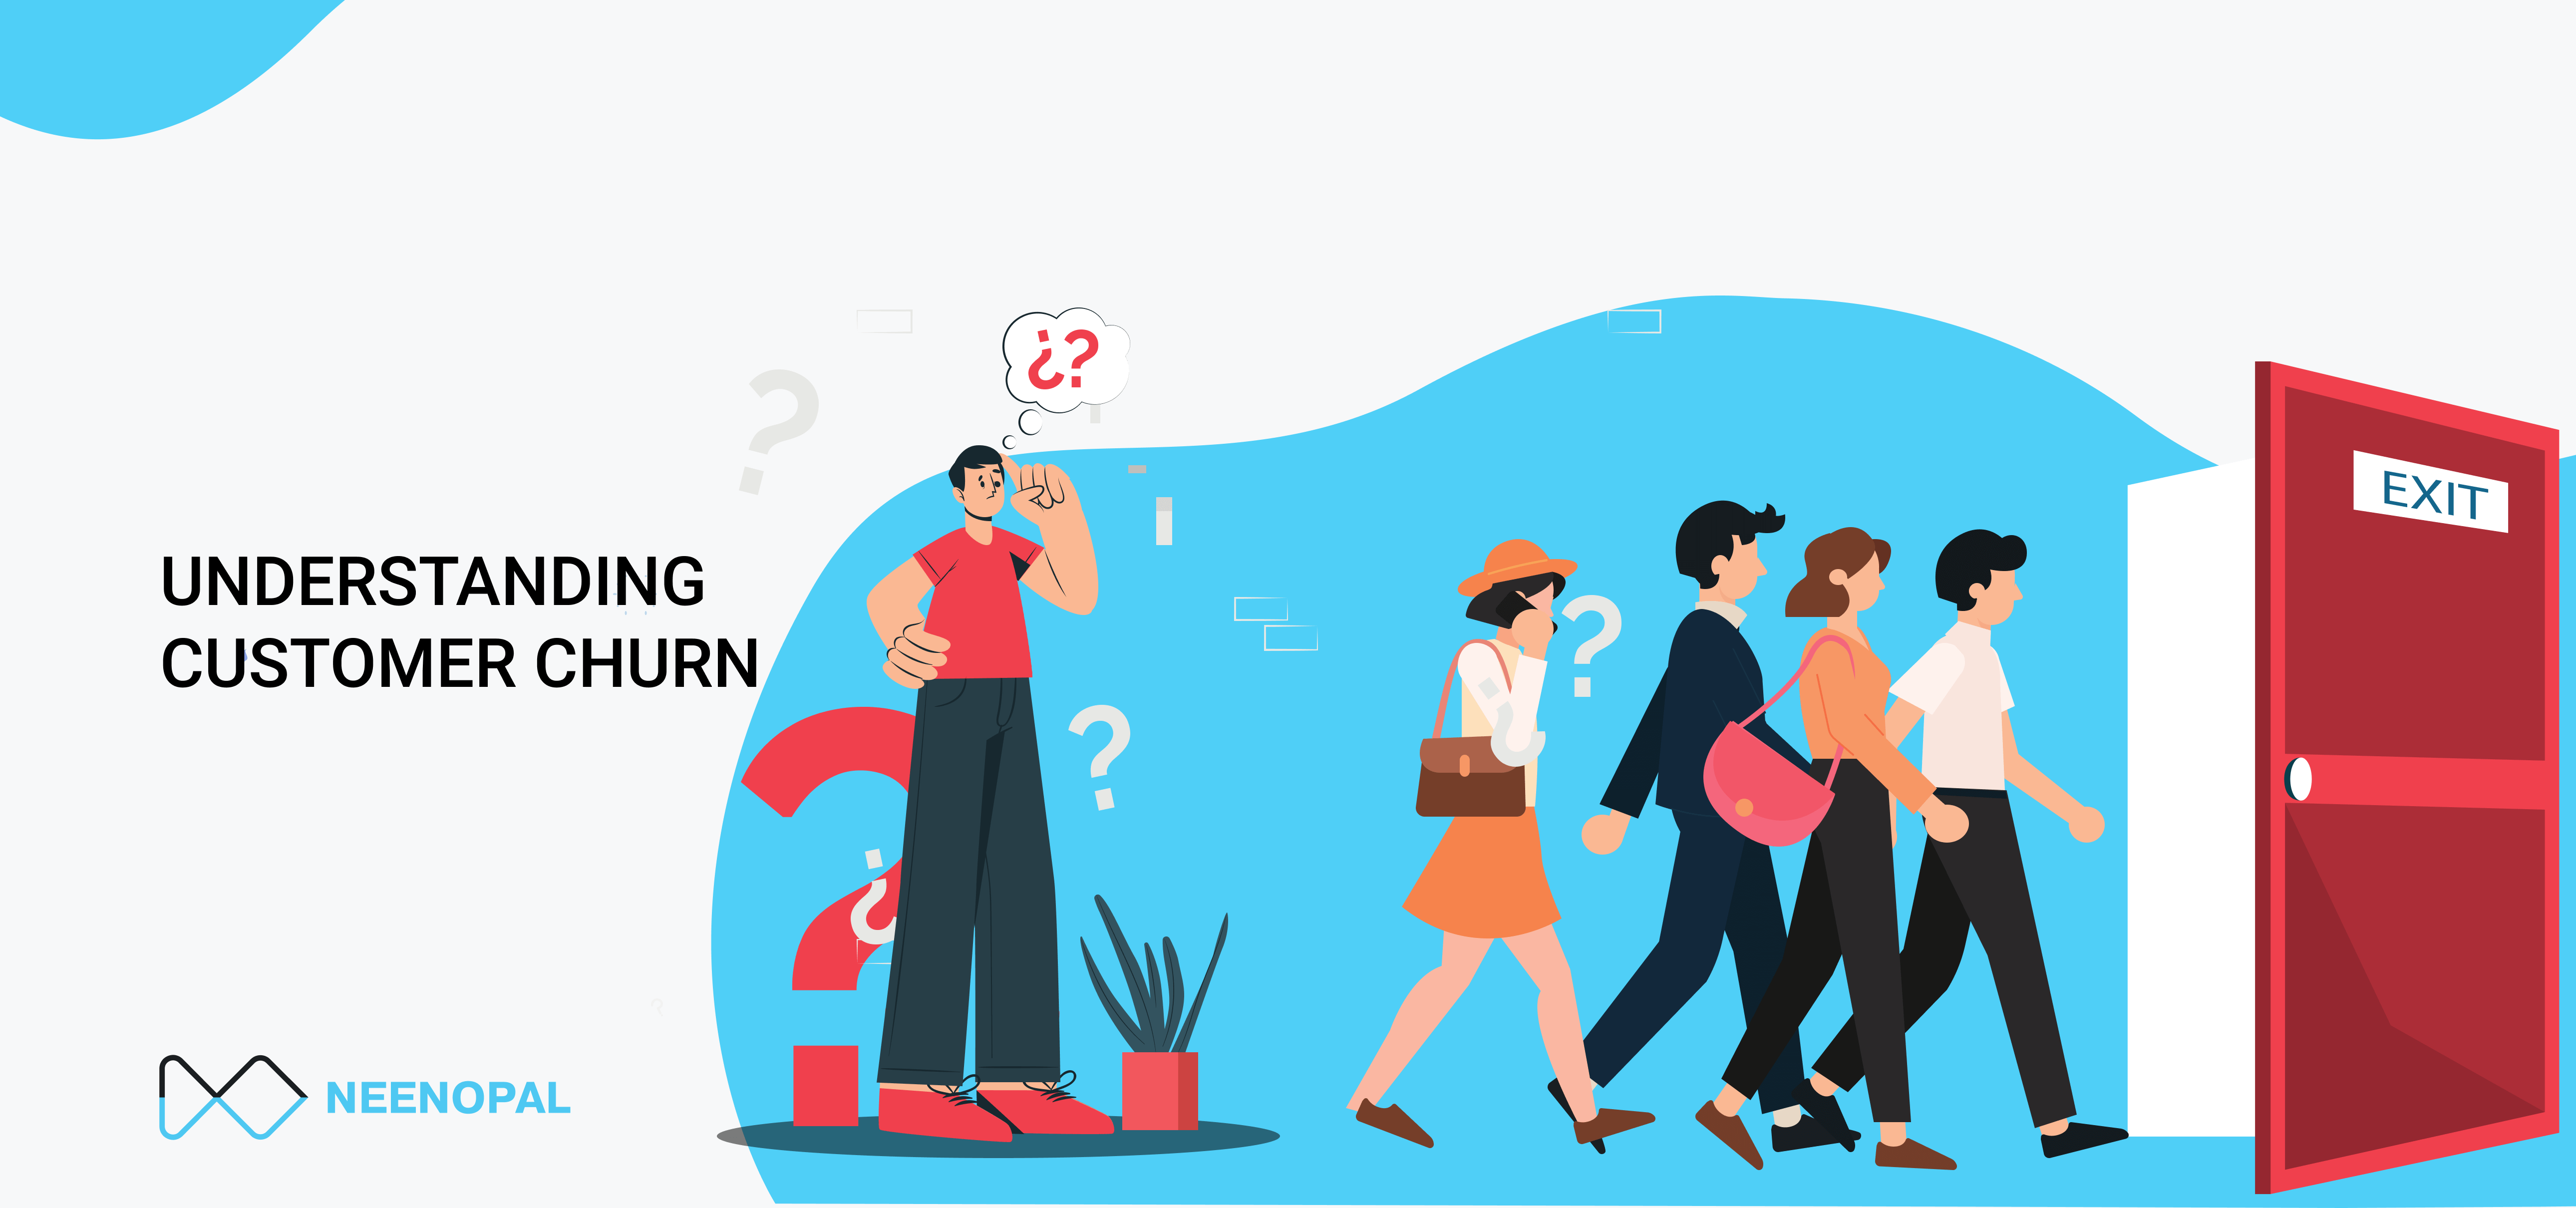

**Churn rate**  
is the number of customers that stopped using company's product or service during a certain time frame.

#Import, Install Libraries & Load the dataset

In [ ]:
# install  Mlxtend (machine learning extensions) 
#mlxtend is a Python library of useful tools for the day-to-day data science tasks.
!pip install mlxtend 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np # Multi-dimensional array object
import pandas as pd # Data Manipulation
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization
import math #extends the list of mathematical functions.
import scipy.stats as stats
from scipy.stats import pointbiserialr
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import LabelEncoder #Encoding the target column
from sklearn.model_selection import train_test_split # split the data in training and testing sets
from sklearn.linear_model import LogisticRegression # LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score ,roc_curve # accuracy_score
from sklearn.metrics import classification_report # classification_report
from imblearn.over_sampling import SMOTE # make the data more balanced
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.ensemble import GradientBoostingClassifier  #GradientBoostingClassifier
from sklearn import metrics #evaluate models
from sklearn.model_selection import learning_curve # learning_curves
import itertools # used to iterate over data structures that can be stepped over using a for-loop. 
import six
import sys
sys.modules['sklearn.externals.six'] = six
from mlxtend.classifier import StackingClassifier # stacking ensemble technique
plt.style.use("ggplot")

In [4]:
# Import telecom dataset into a pandas dataframe
tele_df = pd.read_csv('/content/drive/MyDrive/Telco-Customer-Churn.csv')
# Visualize the first three rows
tele_df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


#Exploratory Data Analysis(EDA)

In [ ]:
print ("Number of Rows     : " ,tele_df.shape[0])
print ("Number of Columns  : " ,tele_df.shape[1])
print ("="*100,"\nFeatures : \n" ,tele_df.columns.tolist())
print ("="*100,"\nMissing values :  ", tele_df.isnull().sum().values.sum())
print ("="*100,"\nUnique values :  \n",tele_df.nunique())
print ("="*100,"\nduplicate values :  \n",tele_df.duplicated().sum())

The data set contains 7043 observations and 21 columns.
Apparently, there are no null or duplicate values on the data set

The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

In [ ]:
# information of the data frame
tele_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Describe function 
Generate descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset's distribution.

In [ ]:
#computes a summary of statistics pertaining to the numerical columns in datframe
tele_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


From the above table , I can conclude the following:

* The SeniorCitizen column has wrongly detected as integer.
*   The tenure column has a right/positively skewed distribution Cuz the mean > median.
*   The MonthlyCharges column has a left/negative skewed  distribution Cuz the  mean < median.

   (I will handle these things later in the data-cleaning stage)



In [ ]:
#computes a summary of statistics pertaining to the categorical columns in datframe
tele_df.describe(exclude='number').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


From the above table , I can conclude the following:

*   The column "Total charges" contains 11 values contains only white spaces.
*   the column TotalCharges was wrongly detected as an object

   (Again I will deal with them later 😊)





In [ ]:
# check unique values of each column
for column in tele_df.columns:
    print('Column: {} - Unique Values: {}'.format(column, tele_df[column].unique()))
    print('==='*15)

Column: customerID - Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender - Unique Values: ['Female' 'Male']
Column: SeniorCitizen - Unique Values: [0 1]
Column: Partner - Unique Values: ['Yes' 'No']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService - Unique Values: ['No' 'Yes']
Column: MultipleLines - Unique Values: ['No phone service' 'No' 'Yes']
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
Column: DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
Column: TechSuppor

In [ ]:
# unique elements of the PaymentMethod column
tele_df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

Some payment method values contain in parenthesis the word automatic. These denominations are too long to be used as tick labels in further visualizations.

#Data Cleaning 

In [5]:
#Convert SeniorCitizen column type from int to object
tele_df['SeniorCitizen'] = tele_df['SeniorCitizen'].astype(str)

In [6]:
#Get the values in TotalCharges that have 11 values contains only white spaces.
tele_df.loc[tele_df['TotalCharges'] == " "]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [7]:
# transform the column TotalCharges into a numeric data type
tele_df['TotalCharges'] = pd.to_numeric(tele_df['TotalCharges'], errors='coerce')

In [8]:
# null observations of the TotalCharges column
tele_df['TotalCharges'].isnull().sum()

11

In [9]:
# null observations of the TotalCharges column
tele_df[tele_df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


The dataset contains only 11 missing values and the dataset has 7043 rows and These 11 observations also have a tenure of 0 even though MontlyCharges is not null for these entries.
This information appeared to be contradictory so I will drop those observations from the data set

In [10]:
# drop observations with null values
tele_df.dropna(inplace=True)

In [11]:
#The customerID column is useless to explain whether not the customer will churn.
# drop the customerID column from the dataset
tele_df.drop(columns='customerID', inplace=True)

In [12]:
# remove (automatic) from payment method names
tele_df['PaymentMethod'] = tele_df['PaymentMethod'].str.replace(' (automatic)', '', regex=False)

In [13]:
# unique elements of the PaymentMethod column after the modification 
tele_df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

In [14]:
#count and drop duplicates
print(tele_df.duplicated().sum())
tele_df.drop_duplicates(inplace=True)


22


#Data Visualization

##Data visualization functions

In [ ]:
#The following code creates a stacked bar for each demographic attribute (gender, SeniorCitizen, Partner, Dependents)
#showing the percentage of Churn for each category of the attribute.
def percentage_stacked_plot(columns_to_plot, super_title,color):
    
    '''
    Prints a 100% stacked plot of the response variable for independent variable of the list columns_to_plot.
            Parameters:
                    columns_to_plot (list of string): Names of the variables to plot
                    super_title (string): Super title of the visualization
                    color : color 
            Returns:
                    None
    '''
    
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure
    fig = plt.figure(figsize=(12, 5 * number_of_rows)) 
    fig.suptitle(super_title, fontsize=22,  y=.95)
 

    # loop to each column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # calculate the percentage of observations of the response variable for each group of the independent variable
        # 100% stacked bar plot
        prop_by_independent = pd.crosstab(tele_df[column], tele_df['Churn']).apply(lambda x: x/x.sum()*100, axis=1)

        prop_by_independent.plot(kind='bar', ax=ax, stacked=True,
                                 rot=0, color=color)

        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True)

        # set title and labels
        ax.set_title('Proportion of observations by ' + column,
                     fontsize=8, loc='left')

        ax.tick_params(rotation='auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

In [ ]:
# plot the histogram distribution of tenure, MontlyCharges, TotalCharges by Churn.
def histogram_plots(columns_to_plot, super_title):
  '''      Prints a histogram for each independent variable of the list columns_to_plot.
           Parameters: 
           columns_to_plot (list of string): Names of the variables to plot
           super_title (string): Super title of the visualization
          
          Returns:
          None
   '''
  
  number_of_columns = 2
  number_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure
  fig = plt.figure(figsize=(12, 5 * number_of_rows)) 
  fig.suptitle(super_title, fontsize=22,  y=.95)
 

    # loop to each demographic column name to create a subplot
  for index, column in enumerate(columns_to_plot, 1): 
    ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # histograms for each class (normalized histogram)
    tele_df[tele_df['Churn']=='No'][column].plot(kind='hist', ax=ax, density=True, 
                                                    alpha=0.5, label='No')
    tele_df[tele_df['Churn']=='Yes'][column].plot(kind='hist', ax=ax, density=True,
                                                    alpha=0.5, label='Yes')
    
    # set the legend in the upper right corner
    ax.legend(loc="upper left", bbox_to_anchor=(0.5, 0.5, 0.5, 0.5),
              title='Churn', fancybox=True)

    # set title and labels
    ax.set_title('Distribution of ' + column + ' by churn',
                  fontsize=10, loc='left')

    ax.tick_params(rotation='auto')

      # eliminate the frame from the plot
    spine_names = ('top', 'right', 'bottom', 'left')
    for spine_name in spine_names:
      ax.spines[spine_name].set_visible(False)
            


In [ ]:
# plot the  distribution of tenure, MontlyCharges, TotalCharges by Churn.
def kdeplot(feature):
    plt.figure(figsize=(9, 3))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(tele_df[tele_df['Churn'] == 'No'][feature], label= 'Churn: No')
    ax0.legend(loc="upper right", bbox_to_anchor=(0.6, 0.6, 0.6, 0.6),
              title='Churn', fancybox=True)
    ax1 = sns.kdeplot(tele_df[tele_df['Churn'] == 'Yes'][feature], label= 'Churn: Yes')
    ax1.legend(loc="upper right", bbox_to_anchor=(0.6, 0.6, 0.6, 0.6),
              title='Churn', fancybox=True)

In [ ]:
def m_kde(column_name):   
  fig, axis = plt.subplots(nrows = 2, ncols = 3, figsize = (18, 8))
  for n,i  in enumerate(data['tenure_group'].unique()):
      df = data[data['tenure_group']==i]
      if n <3 :
          p = 0
      else :
          p = 1
          n-=3
      ax =sns.kdeplot(df[df['Churn'] == 'No'][column_name], label= 'Churn: No',ax=axis[p][n])
      ax =sns.kdeplot(df[df['Churn'] == 'Yes'][column_name], label= 'Churn: Yes',ax=axis[p][n])
      ax.legend(loc="upper right", bbox_to_anchor=(0.5, 0.5, 0.5, 0.5),
              title='Churn', fancybox=True)
      ax.set_title("tenure {0} and KDE for {1}".format(i,column_name))
      plt.tight_layout()

In [ ]:
def plot_multi_learning_curves(estimator, title):

  train_sizes, train_scores, test_scores = learning_curve(estimator=estimator, X=X_train_norm, y=y_train,
                                                        cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                      n_jobs=1)
  # Calculate training and test mean and std
  #
  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)
  # Plot the learning curve
  plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
  plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
  plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
  plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
  plt.title(title)
  plt.xlabel('Training Data Size')
  plt.ylabel('Model accuracy')
  plt.grid()
  plt.legend(loc='lower right')
  return plt

##Univariate Exploration

In [ ]:
# proportion of observation of each class
tele_df['Churn'].value_counts(normalize=True)

No     0.735093
Yes    0.264907
Name: Churn, dtype: float64

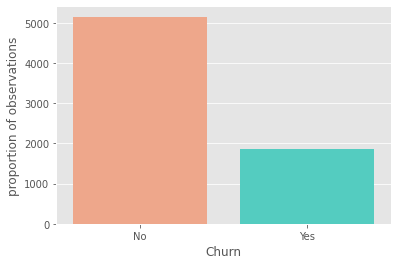

In [ ]:
sns.countplot(x= 'Churn',  data=tele_df,palette=["#FFA07A", "#40E0D0"])
plt.xlabel('Churn')
plt.ylabel('proportion of observations')
plt.show()	

About 26% of the total customers have churned.

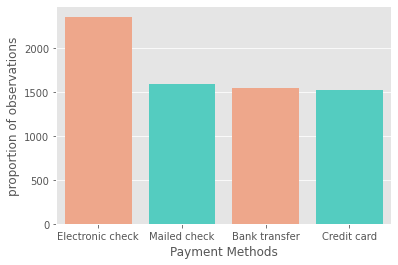

In [ ]:
sns.countplot(x= 'PaymentMethod',  data=tele_df,palette=["#FFA07A", "#40E0D0"])
plt.xlabel('Payment Methods')
plt.ylabel('proportion of observations')
plt.show()	

Most of the customers prefer electronic check



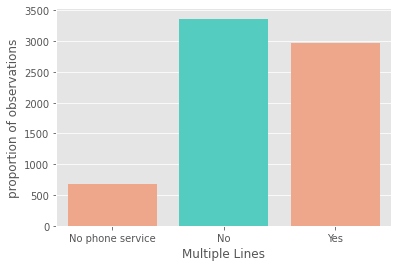

In [ ]:
sns.countplot(x='MultipleLines',  data=tele_df,palette=["#FFA07A", "#40E0D0"])
plt.xlabel('Multiple Lines')
plt.ylabel('proportion of observations')
plt.show()	

Most of customers have single lines



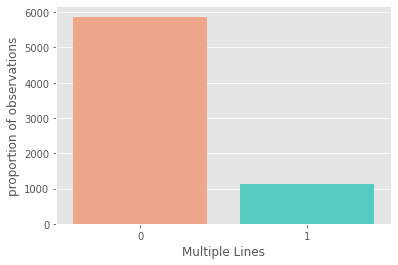

In [ ]:
sns.countplot(x='SeniorCitizen',  data=tele_df,palette=["#FFA07A", "#40E0D0"])
plt.xlabel('Multiple Lines')
plt.ylabel('proportion of observations')
plt.show()	

Most of the customers are not seniors



##Bivariate Exploration

###Demographic Information Vs. Churn

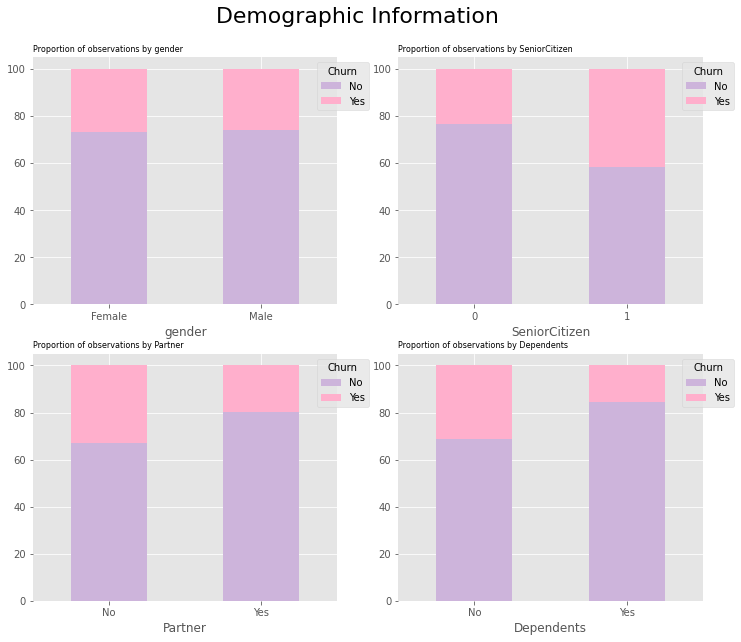

In [ ]:
# demographic column names
demographic_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# stacked plot of demographic columns
percentage_stacked_plot(demographic_columns, 'Demographic Information',["#cdb4db", "#ffafcc"])

from the above  figure I can extract the following conclusions by analyzing demographic attributes:

* The churn rate of senior citizens is almost double that of young citizens.
* the gender column don't have significant predictive power.A similar percentage of churn is shown both when a customer is a man or a woman.
* Customers with a partner churn less than customers with no partner.

###Customer account information Vs. Churn

####Contract, PaperlessBilling and PaymentMethod VS. Churn

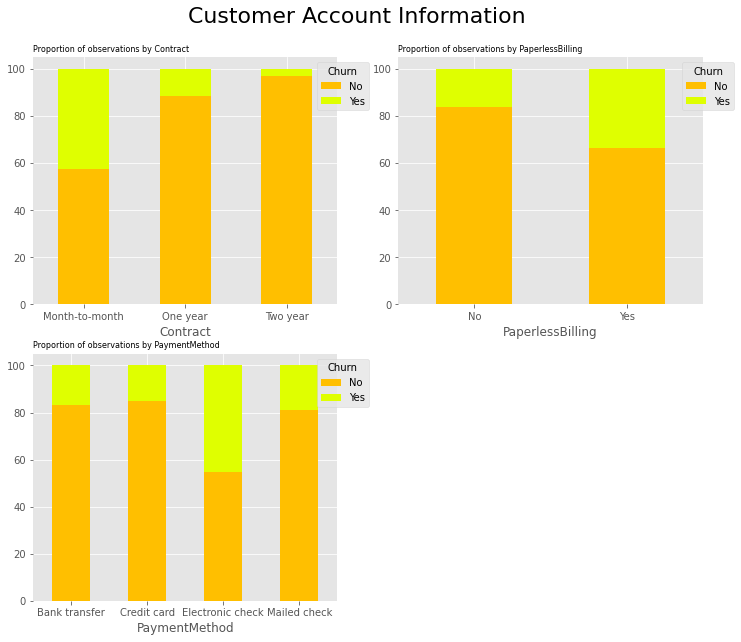

In [ ]:
#evaluate the percentage of Churn for each category of the customer account attributes (Contract, PaperlessBilling, PaymentMethod).
account_columns = ['Contract', 'PaperlessBilling', 'PaymentMethod']
# stacked plot of customer account columns
percentage_stacked_plot(account_columns, 'Customer Account Information',["#FFBF00", "#DFFF00"])

According to the above figure, I can draw the following conclusions from analyzing customer account attributes:
* Customers with month-to-month contracts have higher churn rates compared to clients with yearly contracts.

* Customers who opted for an electronic check as paying method are more likely to leave the company.

* Customers subscribed to paperless billing churn more than those who are not subscribed.

#### Tenure,MonthlyCharges and TotalCharges VS. Churn

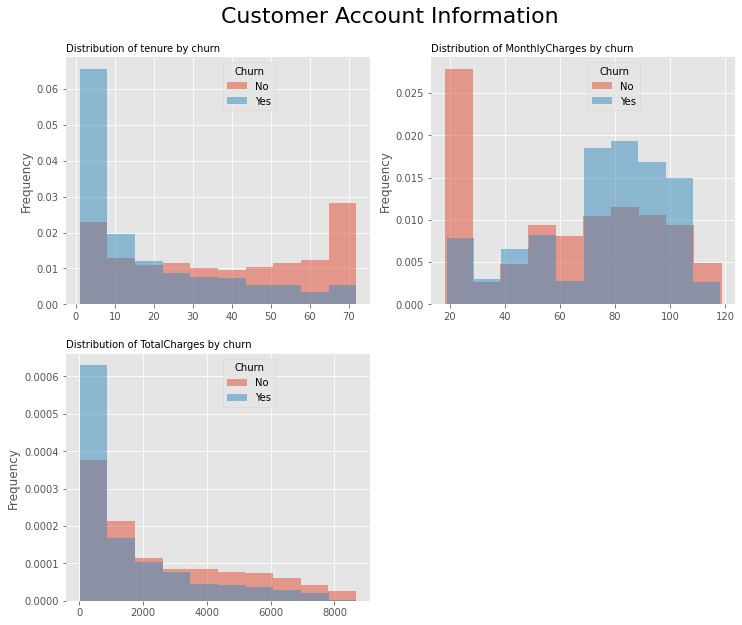

In [ ]:
# customer account column names
account_columns_numeric = ['tenure', 'MonthlyCharges', 'TotalCharges']
# histogram of costumer account columns 
histogram_plots(account_columns_numeric, 'Customer Account Information')

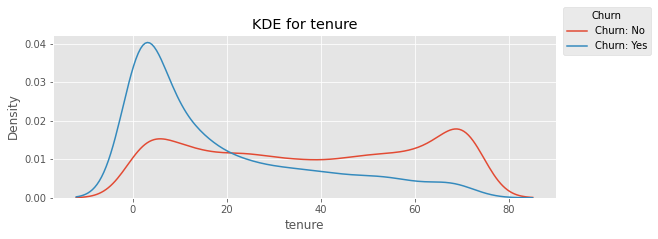

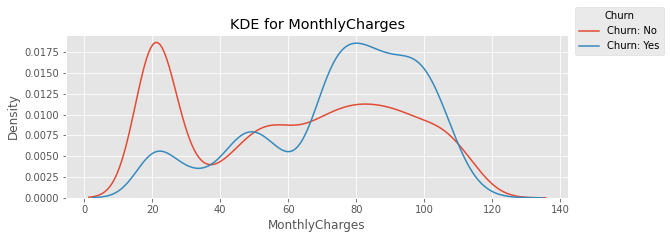

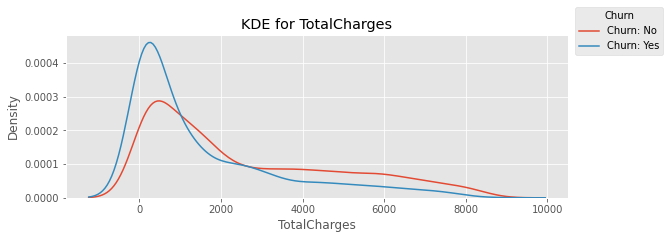

In [ ]:
# tenure and MonthlyCharges and TotalCharges ditribution
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

According to the above figures, I can draw the following conclusions from analyzing customer account attributes:
* The churn rate tends to be larger when monthly charges are high.Therefore, we can infer than customers churn due to high monthly charges.
* New customers (low tenure) are more likely to churn.
* Clients with high total charges are less likely to leave the company.

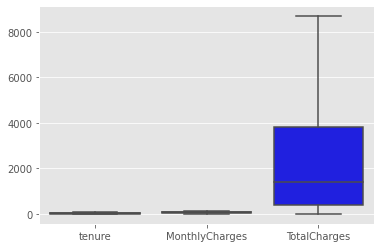

In [ ]:
df = tele_df[['tenure', 'MonthlyCharges', 'TotalCharges']]
plt.figure()
ax = sns.boxplot(data=df,color='blue')
#the data need normalization

###Monthly Charges Vs. Tenure

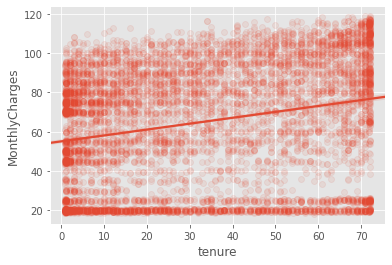

In [ ]:
sns.regplot(x = "tenure", 
            y = "MonthlyCharges", 
            data = tele_df,truncate=False, x_jitter=0.05, scatter_kws={'alpha':0.09})

It appears that loyal customers are with highest monthly charges, and as customer stays for longer period a more trust is bulit therefore higher charges.

###Services Information Vs. Churn

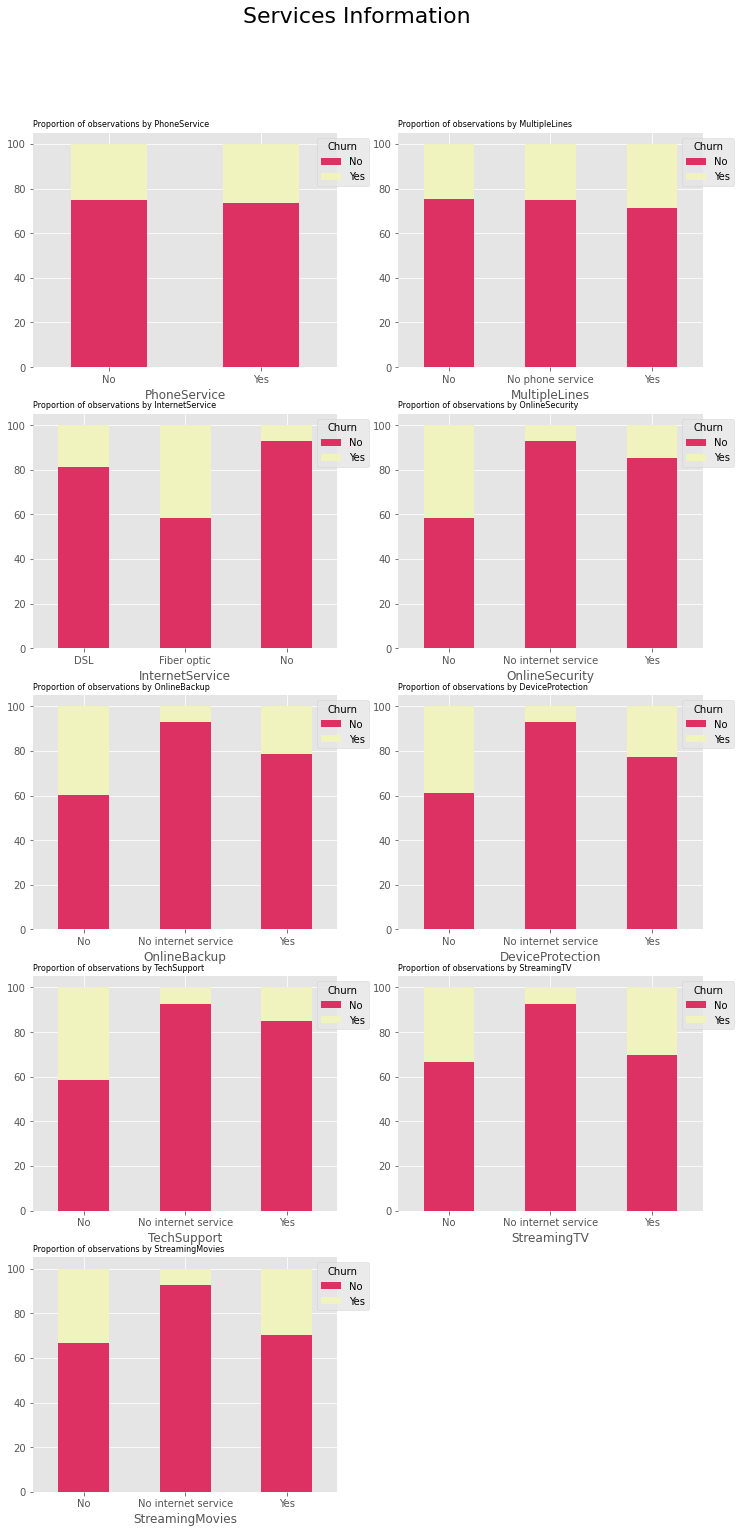

In [ ]:
# plot the percentage of the target for each category of the services columns with stacked bar plots.
# services column names
services_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# stacked plot of services columns
percentage_stacked_plot(services_columns, 'Services Information',['#DE3163','#f0f3bd'])

According to the above figure, I can draw the following conclusions from analyzing customer account attributes:
* the phone attributes (PhoneService and MultipleLines) don't have significant predictive power.The percentage of churn for all classes in both independent variables is nearly the same.

* Clients with online security churn less than those without it.

* Customers with no tech support tend to churn more often than those with tech support.

##Multivariate Exploration


####Tenure VS. Monthly charges VS. Churn

In [ ]:
#Take a copy from the dataframe
data = tele_df.copy()

In [ ]:
def tenure_lab(x) : 
    if x <= 12 :
        return "0-12"
    elif (x > 12) & (x <= 24 ):
        return "12-24"
    elif (x > 24) & (x <= 48) :
        return "24-48"
    elif (x > 48) & (x<= 60) :
        return "48-60"
    elif x > 60 :
        return "gt_60"
data['tenure_group'] = data['tenure'].apply(tenure_lab)

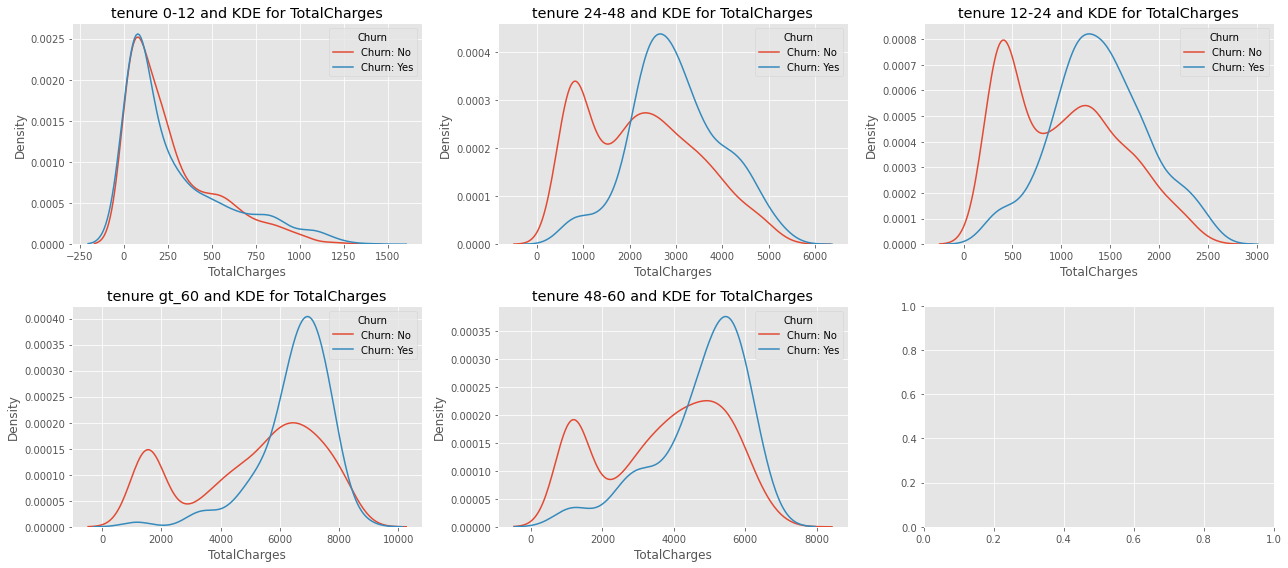

In [ ]:
m_kde("TotalCharges")

The longer the Tenure period, the higher the churn rate when the total charge amount is higher.


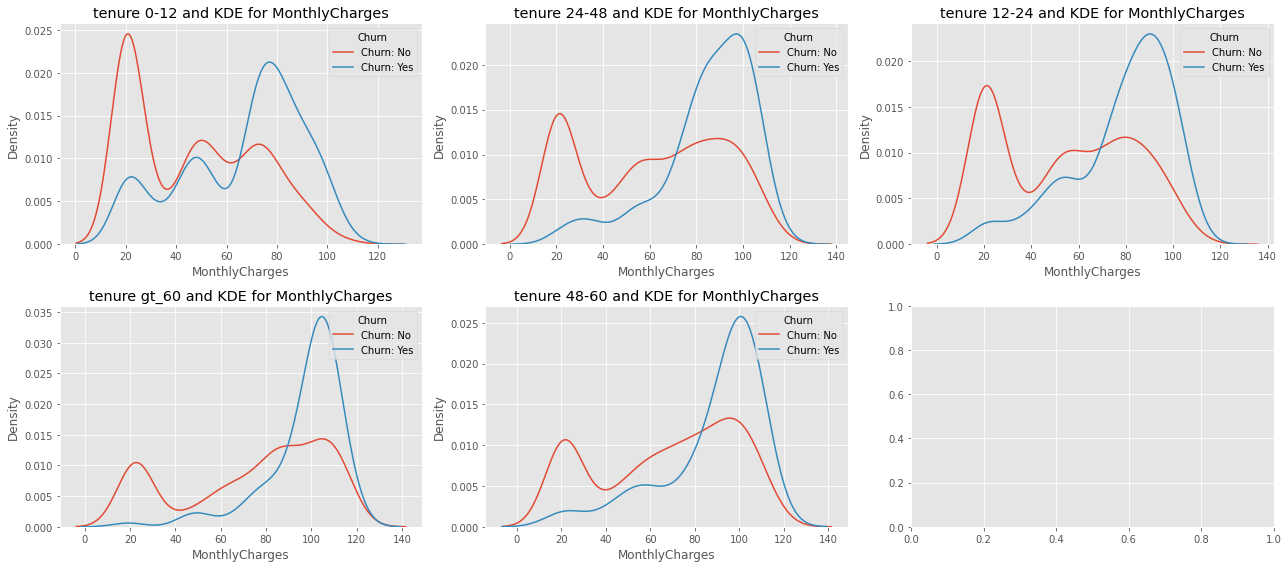

In [ ]:
m_kde("MonthlyCharges")

Regardless of the tenure period, the higher the monthly charges, the higher the churn rate, which is most obvious for customers with a tenure more than 4 years.

##Correlation

###Pearson Correlation

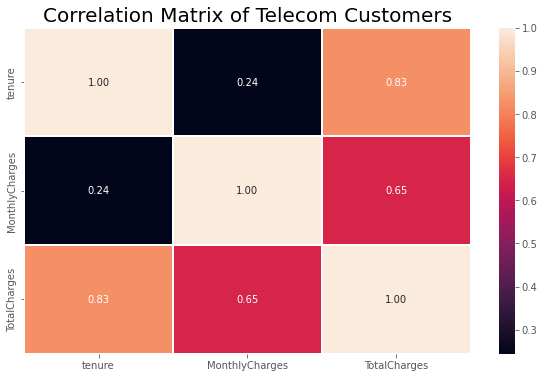

In [ ]:
#measure correlation between tenure , monthly charges and total charges
# Correlation Matrix
corr_matrix = tele_df.corr()
plt.figure(figsize = (10, 6))
cm = sns.heatmap(corr_matrix,
               linewidths = 1,
               annot = True, 
               fmt = ".2f")
plt.title("Correlation Matrix of Telecom Customers", fontsize = 20)
plt.show()

It is clearly shown that "tenure" and "total charges" are highly correlated(The correlation coefficient is 0.83).

###Point biserial correlation

The point biserial correlation coefficient is the same as the Pearson correlation coefficient (measured from -1 to 1).

The only difference is we are comparing dichotomous(binary) data to continuous data instead of continuous data to continuous data.

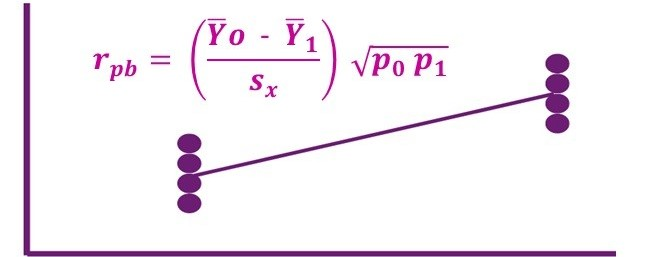

In [ ]:
# get continuous and dichotomous data
columns=['tenure', 'MonthlyCharges', 'TotalCharges']
y = tele_df['Churn'].map({'Yes': 1, 'No': 0}).astype(float).tolist()
corr_list = []
for column in columns:
  x=tele_df[column].tolist()
  corr = stats.pointbiserialr(x,y)
  corr_list.append(corr[0])
print(corr_list)
 

[-0.35333889591891954, 0.19400837993670023, -0.19836180568328032]


It appears that the correlation is week between tenure,monthly charges and total charges with churn.

###Mutual information

Mutual information measures the mutual dependency between two variables based on entropy estimations(how much one random variables tells us about another).Higher values of mutual information show a higher degree of dependency which indicates that the independent variable will be useful for predicting the target.The following code computes the mutual information score between each categorical variable of the data set and the Churn variable.

In [ ]:
# function that computes the mutual infomation score between a categorical columns and the column Churn
#More specifically, it quantifies the "amount of information" obtained 
#about one random variable by observing the other random variable.
def compute_mutual_information(categorical_serie):
    return mutual_info_score(categorical_serie, tele_df.Churn)

# select categorial variables excluding the response variable 
categorical_variables = tele_df.select_dtypes(include=object).drop('Churn', axis=1)

# compute the mutual information score between each categorical variable and the target
feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending=False)

# visualize feature importance
print(feature_importance)

Contract            0.098031
OnlineSecurity      0.064617
TechSupport         0.062960
InternetService     0.055676
OnlineBackup        0.046743
PaymentMethod       0.044250
DeviceProtection    0.043883
StreamingMovies     0.032150
StreamingTV         0.032041
PaperlessBilling    0.018934
Dependents          0.014131
Partner             0.011180
SeniorCitizen       0.010629
MultipleLines       0.000874
PhoneService        0.000062
gender              0.000038
dtype: float64


As shown above, gender, PhoneService, and MultipleLines have a mutual information score really close to 0, meaning those variables do not have a strong relationship with the target. 

#Feature Engineering

In [15]:
# Unnecessary features would decrease the training speed, the model interpretability and the generalization performance on the test data. 
# Therefore, finding and selecting the most useful features in the dataset is crucial.
tele_df = tele_df.drop(["gender", "PhoneService", "MultipleLines"], axis = "columns")

In [16]:
tele_df_transformed = tele_df.copy()

# label encoding (binary variables)
label_encoding_columns = ['Partner', 'Dependents', 'PaperlessBilling','Churn']
le = LabelEncoder()
# encode categorical binary features using label encoding
for column in label_encoding_columns:
  tele_df_transformed[column] = le.fit_transform(tele_df_transformed[column])

In [17]:
# one-hot encoding (categorical variables with more than two levels)
one_hot_encoding_columns = [ 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                            'TechSupport', 'StreamingTV',  'StreamingMovies', 'Contract', 'PaymentMethod']

# encode categorical variables with more than two levels using one-hot encoding

tele_df_transformed = pd.get_dummies(tele_df_transformed, columns = one_hot_encoding_columns)

In [18]:
tele_df_transformed.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer',
       'PaymentMethod_Credit card', 'PaymentMethod_Electronic check',
       'PaymentMethod_Mailed check'],
      dtype='object')

After encoding the categorical variables there are many duplicate features like 'OnlineSecurity_No internet service' and 'OnlineBackup_No internet service'.
 So ,I will remove these repeated features.

In [19]:
#Loop over all the mean values for all features if the mean value exists more than one time
#get that mean and assign it equal to k.
for i in list(tele_df_transformed.describe().loc['mean']):
    if list(tele_df_transformed.describe().loc['mean']).count(i)!=1:
        k=i
#Get all the rows in the descriptive table whose column mean equal to k
tele_df_transformed.describe().loc[:,tele_df_transformed.describe().loc['mean'] ==k]


,InternetService_No,OnlineSecurity_No internet service,OnlineBackup_No internet service,DeviceProtection_No internet service,TechSupport_No internet service,StreamingTV_No internet service,StreamingMovies_No internet service
count,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000
mean,0.214836,0.214836,0.214836,0.214836,0.214836,0.214836,0.214836
std,0.410738,0.410738,0.410738,0.410738,0.410738,0.410738,0.410738
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
redundant = list(tele_df_transformed.describe().loc[:,tele_df_transformed.describe().loc['mean'] ==k].columns)[1:]


In [21]:
tele_df_transformed.drop(columns=redundant,inplace=True) 



Assigning input features to X and output (Churn) to y 


In [22]:
# select independent variables
X = tele_df_transformed.drop(columns='Churn')

# select dependent variables
y = tele_df_transformed.loc[:, 'Churn']

# prove that the variables were selected correctly
print(X.columns)

# prove that the variables were selected correctly
print(y.name)

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer', 'PaymentMethod_Credit card',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')
Churn


Make the dataset more balanced using SMOTE:

Synthetic Minority Over-sampling Technique
Generates new samples of the minority class using KNN.



In [23]:
# make the dataset more blanced
#oversampling used to adjust the class distribution of a data set.
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

###Split data into train and test sets

In [24]:
# split the data in training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=40, shuffle=True)

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

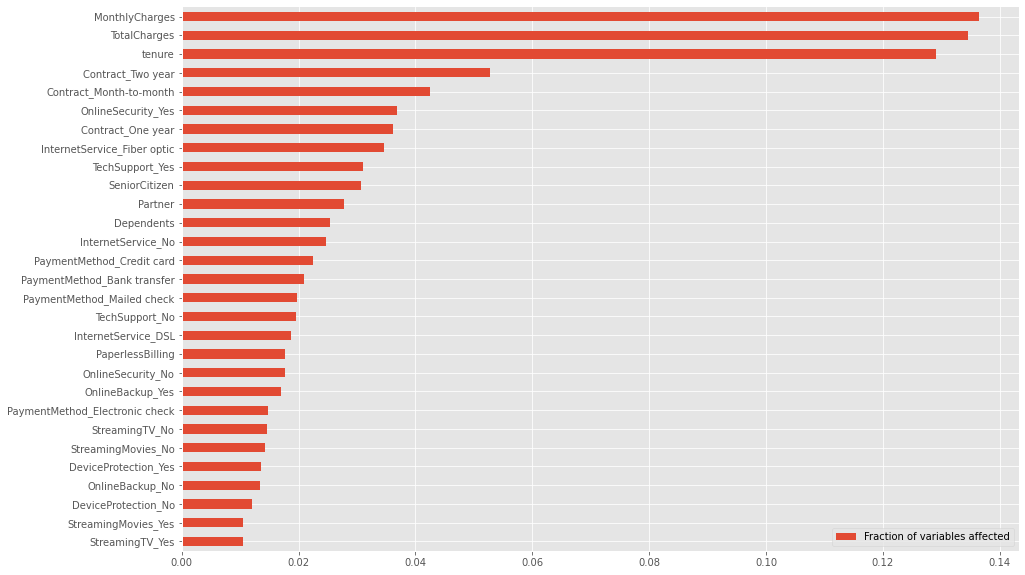

In [26]:
# Plot the feature importance

feat_scores= pd.DataFrame({"Fraction of variables affected" : rf.feature_importances_},index = X.columns)
feat_scores= feat_scores.sort_values(by = "Fraction of variables affected")
feat_scores.plot(kind = "barh", figsize = (15, 10))
sns.despine()

In [27]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataset
X_test_norm = norm.transform(X_test)

#Modeling

##Train and evaluate a logistic regression classifier

In [28]:
# Create an instance of LogisticRegression classifier
lr = LogisticRegression(C=500.0, random_state=40, solver='newton-cg')
 
# Fit the model
lr.fit(X_train_norm, y_train)

LogisticRegression(C=500.0, random_state=40, solver='newton-cg')

In [29]:
# Create the predictions
y_predict = lr.predict(X_test_norm)
 
# Use metrics.accuracy_score to measure the score
print("Accuracy: {:.2f}%".format(lr.score(X_test_norm, y_test)*100))


Accuracy: 84.90%


In [30]:
print(classification_report(y_test, y_predict))
# precision is the ratio of TP/(TP+FP)
# recall is the ratio of TP/(TP+FN)
# F-beta score can be interpreted as a weighted harmonic mean of the precision and recall
# where an F-beta score reaches its best value at 1 and worst score at 0. 

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1246
           1       0.87      0.83      0.85      1331

    accuracy                           0.85      2577
   macro avg       0.85      0.85      0.85      2577
weighted avg       0.85      0.85      0.85      2577



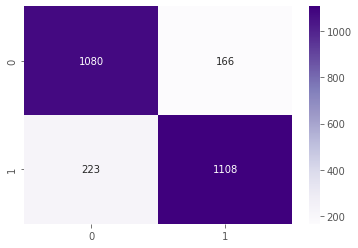

In [31]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True,cmap = 'Purples',fmt='g')

##Train and evaluate a K-NEAREST NEIGHBOUR (KNN)

In [32]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_norm, y_train)

KNeighborsClassifier()

In [33]:
y_predict1 = model_knn.predict(X_test_norm) 

In [34]:
print(classification_report(y_test, y_predict1))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1246
           1       0.83      0.83      0.83      1331

    accuracy                           0.83      2577
   macro avg       0.83      0.83      0.83      2577
weighted avg       0.83      0.83      0.83      2577



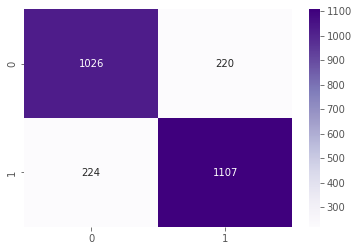

In [35]:
cm = confusion_matrix(y_test, y_predict1)
sns.heatmap(cm, annot = True,cmap = 'Purples',fmt='g')

##Train and evaluate a naive bayes classifier

In [36]:
model_gnb = GaussianNB()
model_gnb.fit(X_train_norm, y_train)

GaussianNB()

In [37]:
y_predict2 = model_gnb.predict(X_test_norm)

In [38]:
print(classification_report(y_test, y_predict2))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78      1246
           1       0.79      0.83      0.81      1331

    accuracy                           0.79      2577
   macro avg       0.80      0.79      0.79      2577
weighted avg       0.79      0.79      0.79      2577



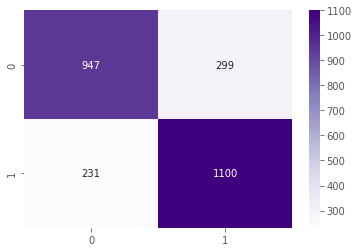

In [39]:
cm = confusion_matrix(y_test, y_predict2)
sns.heatmap(cm, annot = True,fmt="g",cmap = 'Purples')

##Train and evaluate a random forest classifier 

In [40]:
model_rf = RandomForestClassifier(n_estimators= 1000,criterion='entropy', random_state=0)
model_rf.fit(X_train_norm, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

In [41]:
y_predict3 = model_rf.predict(X_test_norm)


In [42]:
print(classification_report(y_test, y_predict3))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1246
           1       0.87      0.85      0.86      1331

    accuracy                           0.86      2577
   macro avg       0.86      0.86      0.86      2577
weighted avg       0.86      0.86      0.86      2577



In [43]:
print(classification_report(y_test, y_predict3))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1246
           1       0.87      0.85      0.86      1331

    accuracy                           0.86      2577
   macro avg       0.86      0.86      0.86      2577
weighted avg       0.86      0.86      0.86      2577



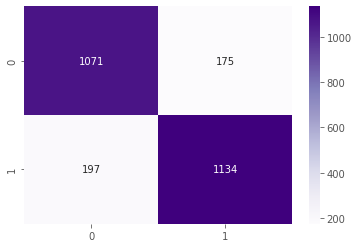

In [44]:
cm = confusion_matrix(y_test, y_predict3)
sns.heatmap(cm, annot = True,cmap = 'Purples',fmt='g')

##Train and evaluate a  support vector machine classifier


In [45]:
from sklearn.svm import SVC

model_svc = SVC(probability=True,random_state=2)
model_svc.fit(X_train_norm, y_train)

SVC(probability=True, random_state=2)

In [46]:
y_predict4 = model_svc.predict(X_test_norm)

In [47]:
print(classification_report(y_test, y_predict4))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1246
           1       0.87      0.83      0.85      1331

    accuracy                           0.85      2577
   macro avg       0.85      0.85      0.85      2577
weighted avg       0.85      0.85      0.85      2577



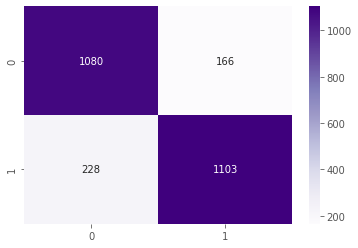

In [48]:
cm = confusion_matrix(y_test, y_predict4)
sns.heatmap(cm, annot = True,cmap = 'Purples',fmt='g')

##Train and evaluate a Gradient Boosting (GradientBoostingClassifier)

In [49]:
GB_model = GradientBoostingClassifier()
GB_model.fit(X_train_norm, y_train)

GradientBoostingClassifier()

In [50]:
preds = GB_model.predict(X_test_norm)
metrics.accuracy_score(y_test, preds)

0.8521536670547147

In [51]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1246
           1       0.86      0.86      0.86      1331

    accuracy                           0.85      2577
   macro avg       0.85      0.85      0.85      2577
weighted avg       0.85      0.85      0.85      2577



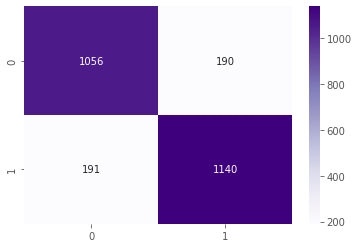

In [52]:
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot = True,cmap = 'Purples',fmt='g')

#Model Evaluation 
Evaluate the the 6 models using ROC curves, AUC scores and learning curves.

In [53]:
# ROC curve
fpr1, tpr1, thresh1 = roc_curve(y_test, lr.predict_proba(X_test_norm)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_knn.predict_proba(X_test_norm)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_gnb.predict_proba(X_test_norm)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_rf.predict_proba(X_test_norm)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, model_svc.predict_proba(X_test_norm)[:, 1], pos_label = 1)
fpr6, tpr6, thresh6 = roc_curve(y_test, GB_model.predict_proba(X_test_norm)[:, 1], pos_label = 1)

In [54]:
# AUC score
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, lr.predict_proba(X_test_norm)[:, 1])
auc_score2 = roc_auc_score(y_test, model_knn.predict_proba(X_test_norm)[:, 1])
auc_score3 = roc_auc_score(y_test, model_gnb.predict_proba(X_test_norm)[:, 1])
auc_score4 = roc_auc_score(y_test, model_rf.predict_proba(X_test_norm)[:, 1])
auc_score5 = roc_auc_score(y_test, model_svc.predict_proba(X_test_norm)[:, 1])
auc_score6 = roc_auc_score(y_test, GB_model.predict_proba(X_test_norm)[:, 1])


print("Logistic Regression: ", auc_score1) # Logistic Regression
print("K-Nearest Neighbors:", auc_score2) # K-Nearest Neighbors
print("Naive Bayes: ", auc_score3) # Naive Bayes
print("Random Forest: ", auc_score4) # Random Forest
print("Support Vector Machine: ", auc_score5) # Support Vector Machine 
print("GradientBoostingClassifier :", auc_score6) # GradientBoostingClassifier


Logistic Regression:  0.934991974317817
K-Nearest Neighbors: 0.9038585381560589
Naive Bayes:  0.8669509522884953
Random Forest:  0.9350905617736335
Support Vector Machine:  0.9202309901074874
GradientBoostingClassifier : 0.9340278070893726


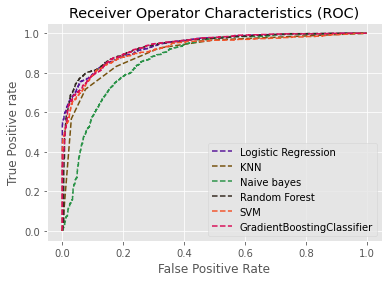

In [55]:
plt.plot(fpr1, tpr1, linestyle = "--", color = "#5a189a", label = "Logistic Regression")
plt.plot(fpr2, tpr2, linestyle = "--", color = "#76520e", label = "KNN")
plt.plot(fpr3, tpr3, linestyle = "--", color = "#2b9348", label = "Naive bayes")
plt.plot(fpr4, tpr4, linestyle = "--", color = "#342a21", label = "Random Forest")
plt.plot(fpr5, tpr5, linestyle = "--", color = "#f2542d", label = "SVM")
plt.plot(fpr6, tpr6, linestyle = "--", color = "#d81159", label = "GradientBoostingClassifier")

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

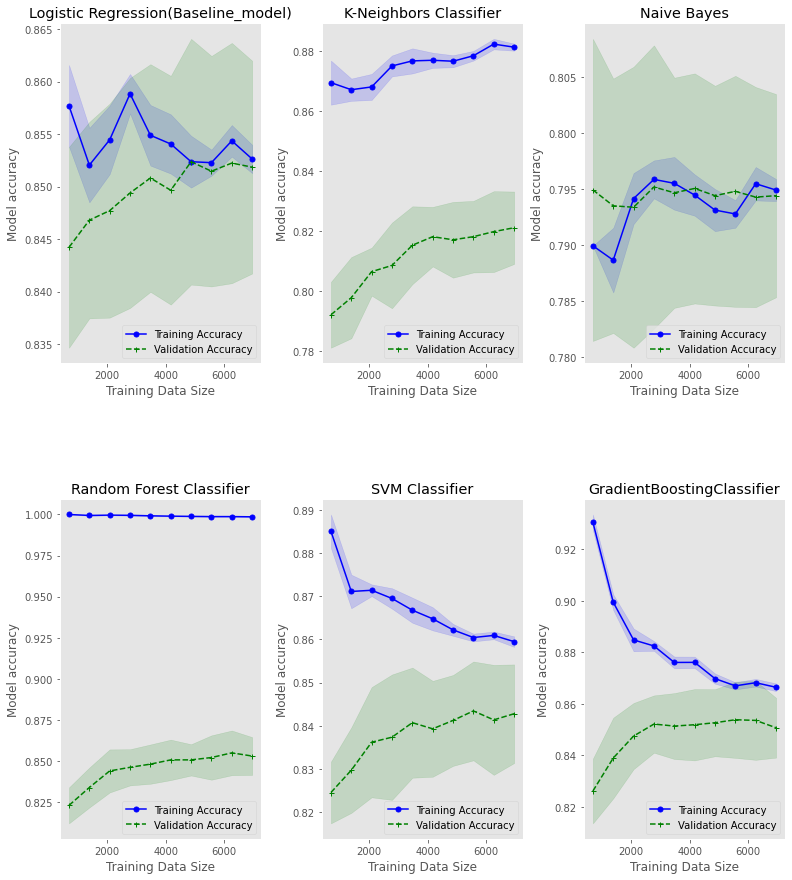

In [ ]:
lst    = [lr,model_knn,model_gnb,model_rf,model_svc,GB_model]

length = len(lst)

mods   = ['Logistic Regression(Baseline_model)',
          'K-Neighbors Classifier','Naive Bayes','Random Forest Classifier',
          'SVM Classifier','GradientBoostingClassifier']

fig = plt.figure(figsize=(13,15))
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    plt.subplot(2,3,j+1)
    plot_multi_learning_curves(i,k)
    plt.subplots_adjust(wspace = .3,hspace = .4)

#Hyperparameter tuning for Gradient Boosting using random search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# define the parameter grid
grid_parameters = {'n_estimators': [80, 90, 100, 110, 115, 120],
                   'max_depth': [3, 4, 5, 6],
                   'max_features': [None, 'auto', 'sqrt', 'log2'], 
                   'min_samples_split': [2, 3, 4, 5]}


# define the RandomizedSearchCV class for trying different parameter combinations
random_search = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                                   param_distributions=grid_parameters,
                                   cv=5,
                                   n_iter=150,
                                   n_jobs=-1)

# fitting the model for random search 
random_search.fit(X_train_norm, y_train)

# print best parameter after tuning
print(random_search.best_params_)

{'n_estimators': 100, 'min_samples_split': 3, 'max_features': 'log2', 'max_depth': 5}


In [ ]:
tunied_GB_model = GradientBoostingClassifier(n_estimators=200, min_samples_split=3,
                                      max_depth=5, 
                                      random_state=40,max_features='log2')
tunied_GB_model.fit(X_train_norm, y_train)

GradientBoostingClassifier(max_depth=5, max_features='log2',
                           min_samples_split=3, n_estimators=200,
                           random_state=40)

In [ ]:
preds = tunied_GB_model.predict(X_test_norm)
metrics.accuracy_score(y_test, preds)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1246
           1       0.87      0.85      0.86      1331

    accuracy                           0.85      2577
   macro avg       0.85      0.85      0.85      2577
weighted avg       0.85      0.85      0.85      2577



In [ ]:
auc_score7 = roc_auc_score(y_test, tunied_GB_model.predict_proba(X_test_norm)[:, 1])
print("Tuned GradientBoostingClassifier :", auc_score7) # GradientBoostingClassifier


Tuned GradientBoostingClassifier : 0.9378205599767492


I will use the first model (model without hyperparameters tuning) COZ the result is almost the same and the time the tuned model takes to train is higher that the model without tuning.

Amongst all the trained models, Gradient Boosting Classifier , SVM and logistic regression algorithms produced the highest recall and the highest Area under the ROC curve (AUC) SO I will use stacking to combine the three models to improve model performance.

#Model Selection & Stacking

Stacking is an ensemble learning technique to combine multiple classification models via a meta-classifier.

Meta classifier is simply the classifier that makes a final prediction among all the predictions by using those predictions as features. So, it takes classes predicted by various classifiers and pick the final one as the result that you need.

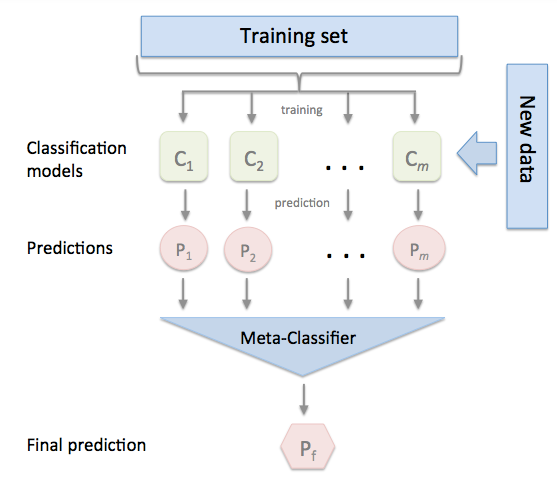

In [56]:
clf_stack = StackingClassifier(classifiers =[model_svc, GB_model], meta_classifier =lr, use_probas = True, use_features_in_secondary = True)


In [57]:
model_stack = clf_stack.fit(X_train_norm, y_train)   # training of stacked model
pred_stack = model_stack.predict(X_test_norm) 

In [58]:
acc_stack = accuracy_score(y_test, pred_stack)  # evaluating accuracy
print('accuracy score of Stacked model:', acc_stack * 100)

accuracy score of Stacked model: 85.48700038804812


In [59]:
print(classification_report(y_test, pred_stack))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1246
           1       0.87      0.84      0.86      1331

    accuracy                           0.85      2577
   macro avg       0.85      0.86      0.85      2577
weighted avg       0.86      0.85      0.85      2577



#CONCLUSION 

###Models and metrics
I used six different machines learning algorithms:

          *   Logistic Regression.
          *   k-nearest neighbors algorithm -KNN.

          *   Naive bayes.
          *   Random forest.

          *   Support Vector Machines - SVM.
          *   Gradient boosting classifiers.

Each of these algorithms was trained using balanced data and evaluated using AUC, recall and learning curves and then combined the three models that get the highest recall and Auc.

### Metrics

      Depend on the business needs The most important metric is Recall because it's preferable to have
      a model that does not miss any churns but
      sometimes classify a non-churns as churns,
      than a model that does not classify non-churns
      as churns but misses a lot of churns. 
      In other words, we prefer to be incorrect when classifying a non-churning costumer than when
      classifying a churning customer.I also kept 
      track of Precision as a secondary metric.







###Final results



The Final results of the Stacked Classifier model

    Accuracy: ~85% label accuracy
    Precision: ~84% labeled as Retained customers and ~87% labeled as churned customers
    Recall: ~87% labeled as Retained customers and ~84% labeled as churned customers
